In [5]:
import pandas as pd
import numpy as np 
# from prophet import Prophet
import matplotlib.pyplot as plt
file = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\household_power_consumption.txt", delimiter = ";")

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_8540\206449134.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\household_power_consumption.txt", delimiter = ";")


C:\Users\Kaybee\AppData\Local\Temp\ipykernel_8540\497153143.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  file["Date"] = pd.to_datetime(file["Date"])
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_8540\497153143.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  file.fillna(method='ffill')


<Axes: title={'center': 'Hourly Global Active Power'}, xlabel='Date'>

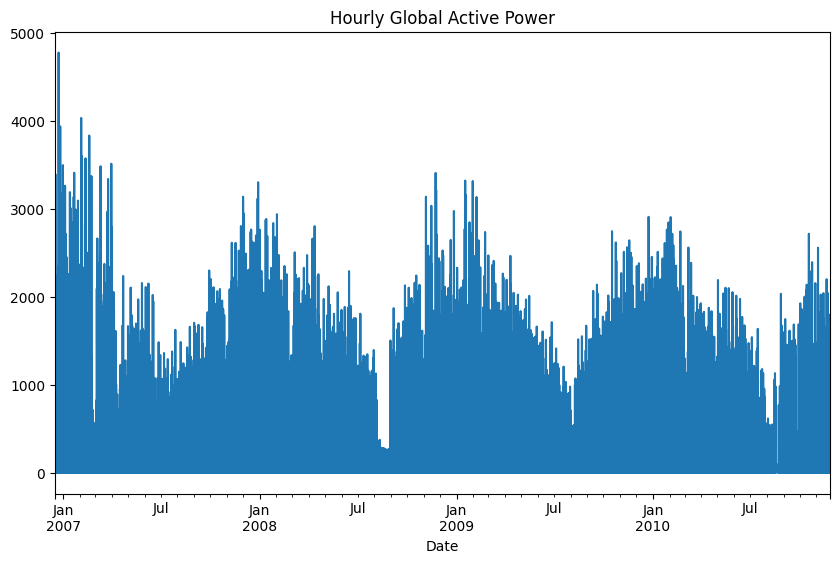

In [6]:
file["Date"] = pd.to_datetime(file["Date"])
file.set_index("Date",  inplace=True)

for column in file.columns:
    file[column] = pd.to_numeric(file[column], errors='coerce')
file.fillna(method='ffill')
# df["Sub_metering_3"].dtypes
hour = file.resample('h').sum()
# Plotting the hourly global_active_power over time
hour['Global_active_power'].plot(figsize=(10, 6), title='Hourly Global Active Power')

In [10]:
hour

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16 00:00:00,0.0,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-16 01:00:00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 02:00:00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 03:00:00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 04:00:00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2010-11-25 20:00:00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2010-11-25 21:00:00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2010-11-25 22:00:00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.0


In [7]:
if 'Global_active_power' in file.columns and 'Voltage' in file.columns:
    # Calculate the Pearson correlation coefficient
    correlation = file['Global_active_power'].corr(file['Voltage'])
    print(f'The Pearson correlation coefficient between global_active_power and voltage is: {correlation:.3f}')

The Pearson correlation coefficient between global_active_power and voltage is: -0.400


In [8]:
if 'Global_active_power' in file.columns and 'Voltage' in file.columns:
    # Calculate the Pearson correlation coefficient
    correlation = file['Voltage'].corr(file['Global_intensity'])
    print(f'The Pearson correlation coefficient between Voltage and Global_intensity is: {correlation:.2f}')

The Pearson correlation coefficient between Voltage and Global_intensity is: -0.41


In [9]:
import numpy as np
print(np.__version__)


2.0.0


In [12]:
file1 = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\household_power_consumption.txt", delimiter = ";")
file1["Date"] = pd.to_datetime(file1["Date"])
file1 = file1.rename(columns= {"Date": 'ds', "Global_active_power": 'y'})
file1.set_index('ds', inplace = True)
file1


C:\Users\Kaybee\AppData\Local\Temp\ipykernel_8540\3709190559.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  file1 = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\household_power_consumption.txt", delimiter = ";")
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_8540\3709190559.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  file1["Date"] = pd.to_datetime(file1["Date"])


,Time,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
ds,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...
2010-11-26,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2010-11-26,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0


In [14]:
from prophet import Prophet

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

In [17]:
#  To fix the prophet library problem
np.float_ = np.float64
# import prophet library
from prophet import Prophet


In [63]:
for column in file1.columns:
    file1[column] = pd.to_numeric(file1[column], errors='coerce')
file1.fillna(method='ffill')

hourly = file1.resample('W').sum()
hourly

hourly.reset_index(inplace=True)

x = len(hourly)
train_set = hourly.iloc[:x - 300]
test_set = hourly.iloc[x -300:]
model = Prophet()
model.fit(train_set)



C:\Users\Kaybee\AppData\Local\Temp\ipykernel_8540\2131122705.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  file1.fillna(method='ffill')
12:17:05 - cmdstanpy - INFO - Chain [1] start processing
12:17:05 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 500x500 with 0 Axes>

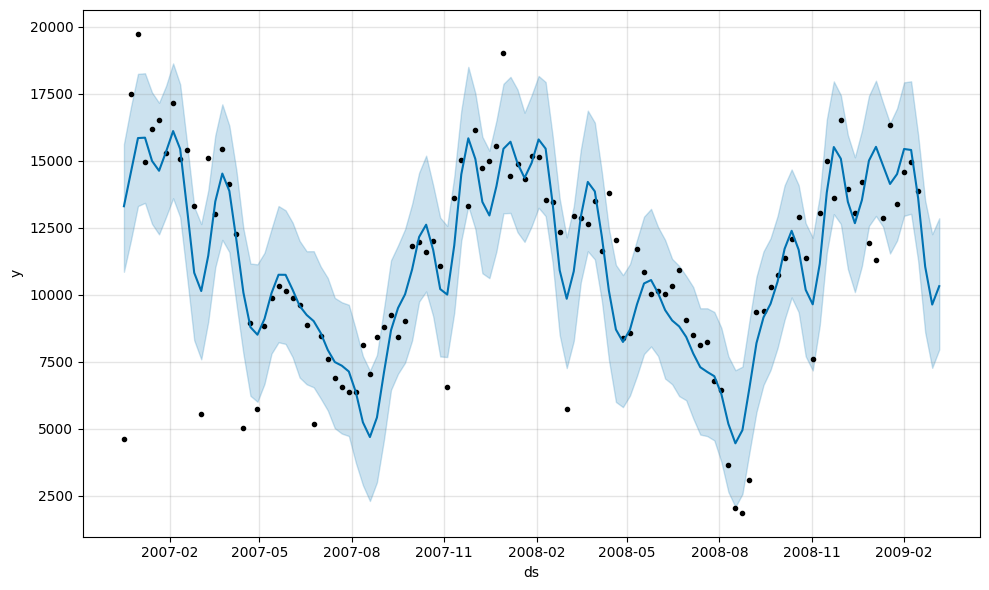

Mean Absolute Percentage Error (MAPE): 21.42%
Root mean squared error (RMSE): 254865.80%


In [70]:
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
future = model.make_future_dataframe(periods= 3, freq= 'W')
forecast = model.predict(future)
predictions = forecast[['ds', 'yhat']]
comparison = test_set.merge(predictions)
plt.figure(figsize=(5,5))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper' ]]
model.plot(forecast)
plt.show()



predictions = forecast[['ds', 'yhat']].iloc[-300:]
comparison = test_set.merge(predictions)
y_true = comparison['y']
y_pred = comparison['yhat']
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')
print(f'Root mean squared error (RMSE): {rmse * 100:.2f}%')

In [ ]:
hourly.columns

Index(['Time', 'y', 'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')